In [ ]:
!wget https://uc.hackerearth.com/he-public-data/callsf0d4f5a.csv -O calls.csv
!wget https://uc.hackerearth.com/he-public-data/customers2afd6ea.csv -O customers.csv
!wget https://uc.hackerearth.com/he-public-data/reason18315ff.csv -O reason.csv
!wget https://uc.hackerearth.com/he-public-data/sentiment_statisticscc1e57a.csv -O sentiment_statistics.csv
!wget https://uc.hackerearth.com/he-public-data/testbc7185d.csv -O test.csv

--2024-10-10 08:17:40--  https://uc.hackerearth.com/he-public-data/callsf0d4f5a.csv
Resolving uc.hackerearth.com (uc.hackerearth.com)... 18.239.50.13, 18.239.50.68, 18.239.50.40, ...
Connecting to uc.hackerearth.com (uc.hackerearth.com)|18.239.50.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205461381 (196M) [binary/octet-stream]
Saving to: ‘calls.csv’

calls.csv           100%[===================>] 195.94M   159MB/s    in 1.2s    

2024-10-10 08:17:41 (159 MB/s) - ‘calls.csv’ saved [205461381/205461381]

--2024-10-10 08:17:41--  https://uc.hackerearth.com/he-public-data/customers2afd6ea.csv
Resolving uc.hackerearth.com (uc.hackerearth.com)... 18.239.50.13, 18.239.50.68, 18.239.50.40, ...
Connecting to uc.hackerearth.com (uc.hackerearth.com)|18.239.50.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1996498 (1.9M) [binary/octet-stream]
Saving to: ‘customers.csv’

customers.csv       100%[===================>]   1.90M  --.-KB/s 

In [ ]:
!ls -lah

total 203M
drwxr-xr-x 1 root root 4.0K Oct 10 08:17 .
drwxr-xr-x 1 root root 4.0K Oct 10 08:15 ..
-rw-r--r-- 1 root root 196M Oct  7 15:00 calls.csv
drwxr-xr-x 4 root root 4.0K Oct  7 18:36 .config
-rw-r--r-- 1 root root 2.0M Oct  7 15:02 customers.csv
-rw-r--r-- 1 root root 1.6M Oct  7 15:01 reason.csv
drwxr-xr-x 1 root root 4.0K Oct  7 18:37 sample_data
-rw-r--r-- 1 root root 3.0M Oct  7 14:59 sentiment_statistics.csv
-rw-r--r-- 1 root root  61K Oct  7 14:59 test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')


In [32]:
# Display basic information about the datasets
print("Calls Dataset:")
print(calls_df.info())
print("\nCustomers Dataset:")
print(customers_df.info())
print("\nReason Dataset:")
print(reason_df.info())
print("\nSentiment Statistics Dataset:")
print(sentiment_df.info())
print("\nTest Dataset:")
print(test_df.info())

Calls Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 66653 entries, 0 to 71809
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  66653 non-null  int64         
 1   customer_id              66653 non-null  int64         
 2   agent_id                 66653 non-null  int64         
 3   call_start_datetime      66653 non-null  datetime64[ns]
 4   agent_assigned_datetime  66653 non-null  datetime64[ns]
 5   call_end_datetime        66653 non-null  datetime64[ns]
 6   call_transcript          66653 non-null  object        
 7   AHT                      66653 non-null  float64       
 8   AST                      66653 non-null  float64       
 9   primary_call_reason      66653 non-null  object        
 10  processed_transcript     66653 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(3), object(3)
memory usage: 6.1+ MB
None

C

In [ ]:
print("\nMissing Values:")
print(calls_df.isnull().sum())

# 2. Describe numerical columns
print("\nNumerical Columns Summary:")
print("Size of Calls Dataset: ", calls_df.shape)
print(calls_df.describe())




Missing Values:
call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

Numerical Columns Summary:
Size of Calls Dataset:  (71810, 7)
            call_id   customer_id       agent_id
count  7.181000e+04  7.181000e+04   71810.000000
mean   4.993574e+09  5.004334e+09  564768.278039
std    2.889673e+09  2.884255e+09  257532.362167
min    1.316420e+05  1.197800e+04  102574.000000
25%    2.480013e+09  2.514618e+09  347606.000000
50%    4.989448e+09  4.999664e+09  591778.000000
75%    7.493629e+09  7.509126e+09  786323.000000
max    9.999806e+09  9.999935e+09  993862.000000


In [ ]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [ ]:
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()
calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

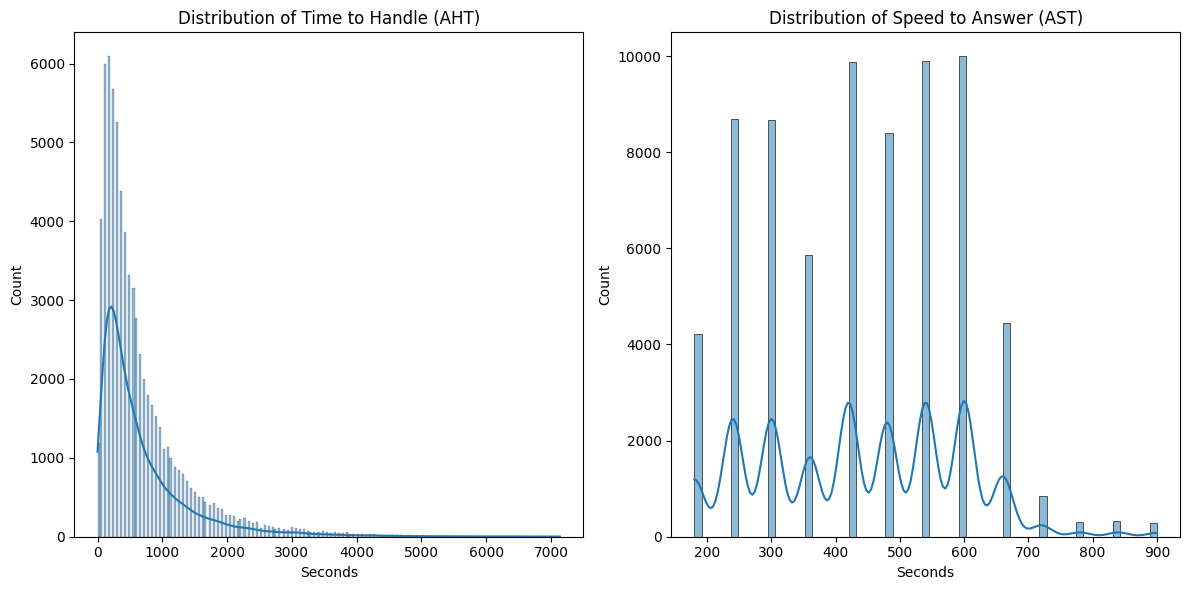

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(calls_df['AHT'], kde=True)
plt.title('Distribution of Time to Handle (AHT)')
plt.xlabel('Seconds')

plt.subplot(1, 2, 2)
sns.histplot(calls_df['AST'], kde=True)
plt.title('Distribution of Speed to Answer (AST)')
plt.xlabel('Seconds')

plt.tight_layout()
plt.show()


In [ ]:
average_AHT = calls_df['AHT'].mean()
average_AST = calls_df['AST'].mean()

print(f"Average Handle Time (AHT): {average_AHT} seconds")
print(f"Average Speed to Answer (AST): {average_AST} seconds")

Average Handle Time (AHT): 697.0486004734717 seconds
Average Speed to Answer (AST): 437.0675393399248 seconds


In [ ]:
calls_df.head()

call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  
0  \n\nAgent: Thank you for calling United Airlin...  1860.0  420.0  
1  \n\nAgent: Thank you for calling United Airlin...   720.0  180.0  
2  \n\nAgent: Thank you for calling United Airlin...  1140.0  480.0  
3  \n\nAgent: Thank you for calling United Airlin...   420.0  300.0  
4  \n\nAgent: Thank you for calling United Airlin...   540.0  600.0

In [ ]:
customers_df.head()

customer_id      customer_name  elite_level_code
0   2033123310     Matthew Foster               4.0
1   8186702651      Tammy Walters               NaN
2   2416856629      Jeffery Dixon               NaN
3   1154544516      David Wilkins               2.0
4   5214456437  Elizabeth Daniels               0.0

In [ ]:
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna(0)
customers_df['elite_level_code'].unique()

array([4., 0., 2., 5., 1., 3.])

In [ ]:
reason_df.head()

call_id primary_call_reason
0  4667960400   Voluntary  Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating

In [ ]:
calls_df = pd.merge(calls_df, reason_df, on='call_id', how='left')
calls_df.head()

call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript     AHT    AST  \
0  \n\nAgent: Thank you for calling United Airlin...  1860.0  420.0   
1  \n\nAgent: Thank you for calling United Airlin...   720.0  180.0   
2  \n\nAgent: Thank you for calling United Airlin...  1140.0  480.0   
3  \n\nAgent: Thank you for calling United Airlin...   420.0  300.0   
4  \n\nAgent: Thank you for calling United Airlin...   540.0  600.0   

  primary_call_reason  
0   Voluntary  Cancel  
1             Booking  
2              IRROPS  
3             Upgrade  
4             Seating

In [ ]:
calls_df = calls_df[calls_df['primary_call_reason'].notnull()]
calls_df['primary_call_reason'] = calls_df['primary_call_reason'].fillna('Unknown').apply(lambda x: ' '.join(x.split()).capitalize())
calls_df['primary_call_reason'].unique()

array(['Voluntary cancel', 'Booking', 'Irrops', 'Upgrade', 'Seating',
       'Mileage plus', 'Checkout', 'Voluntary change', 'Post flight',
       'Check in', 'Other topics', 'Communications', 'Schedule change',
       'Products & services', 'Digital support', 'Disability',
       'Unaccompanied minor', 'Baggage', 'Traveler updates', 'Etc',
       'Post-flight', 'Check-in', 'Products and services'], dtype=object)

<ipython-input-16-8d3f435a4b07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_call_reason', data=calls_df, order=calls_df['primary_call_reason'].value_counts().index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-pack

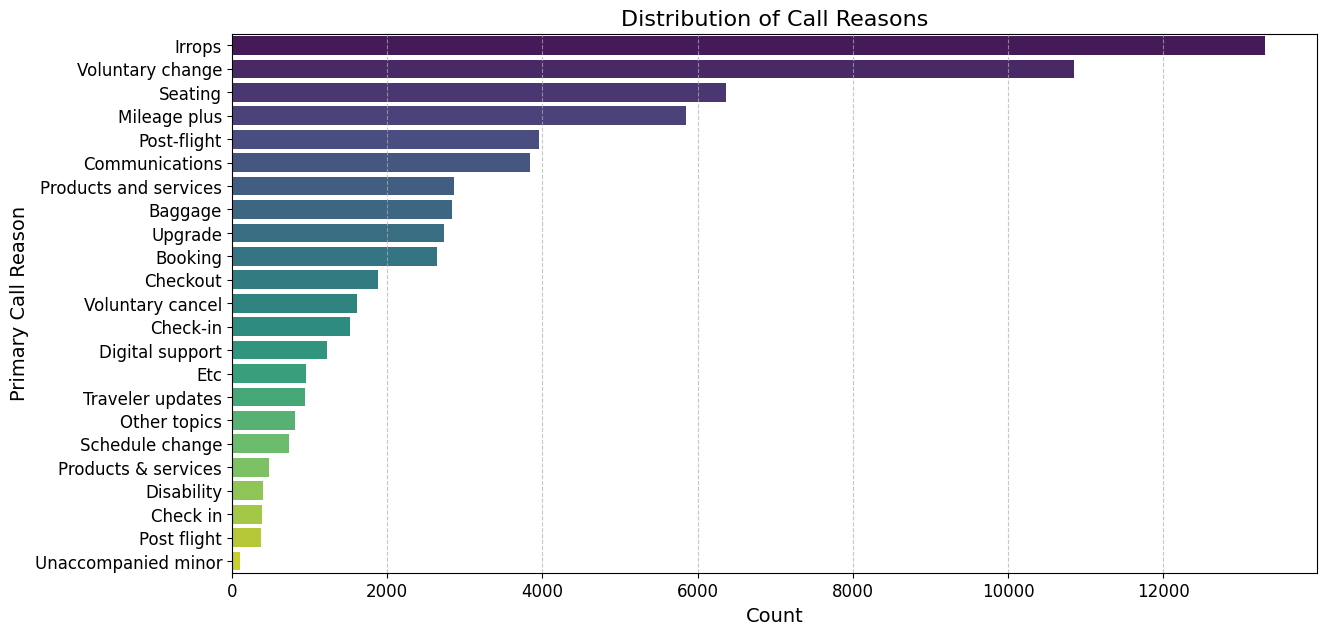

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(y='primary_call_reason', data=calls_df, order=calls_df['primary_call_reason'].value_counts().index, palette='viridis')
plt.title('Distribution of Call Reasons', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Primary Call Reason', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


Analysis for Primary Call Reason: Voluntary cancel


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Booking


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Irrops


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Upgrade


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Seating


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Mileage plus


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Checkout


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Voluntary change


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Post flight


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Check in


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Other topics


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Communications


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Schedule change


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Products & services


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Digital support


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Disability


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Unaccompanied minor


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Baggage


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Traveler updates


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Etc


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Post-flight


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Check-in


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


Analysis for Primary Call Reason: Products and services


<ipython-input-22-47c78cfcd7e8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)


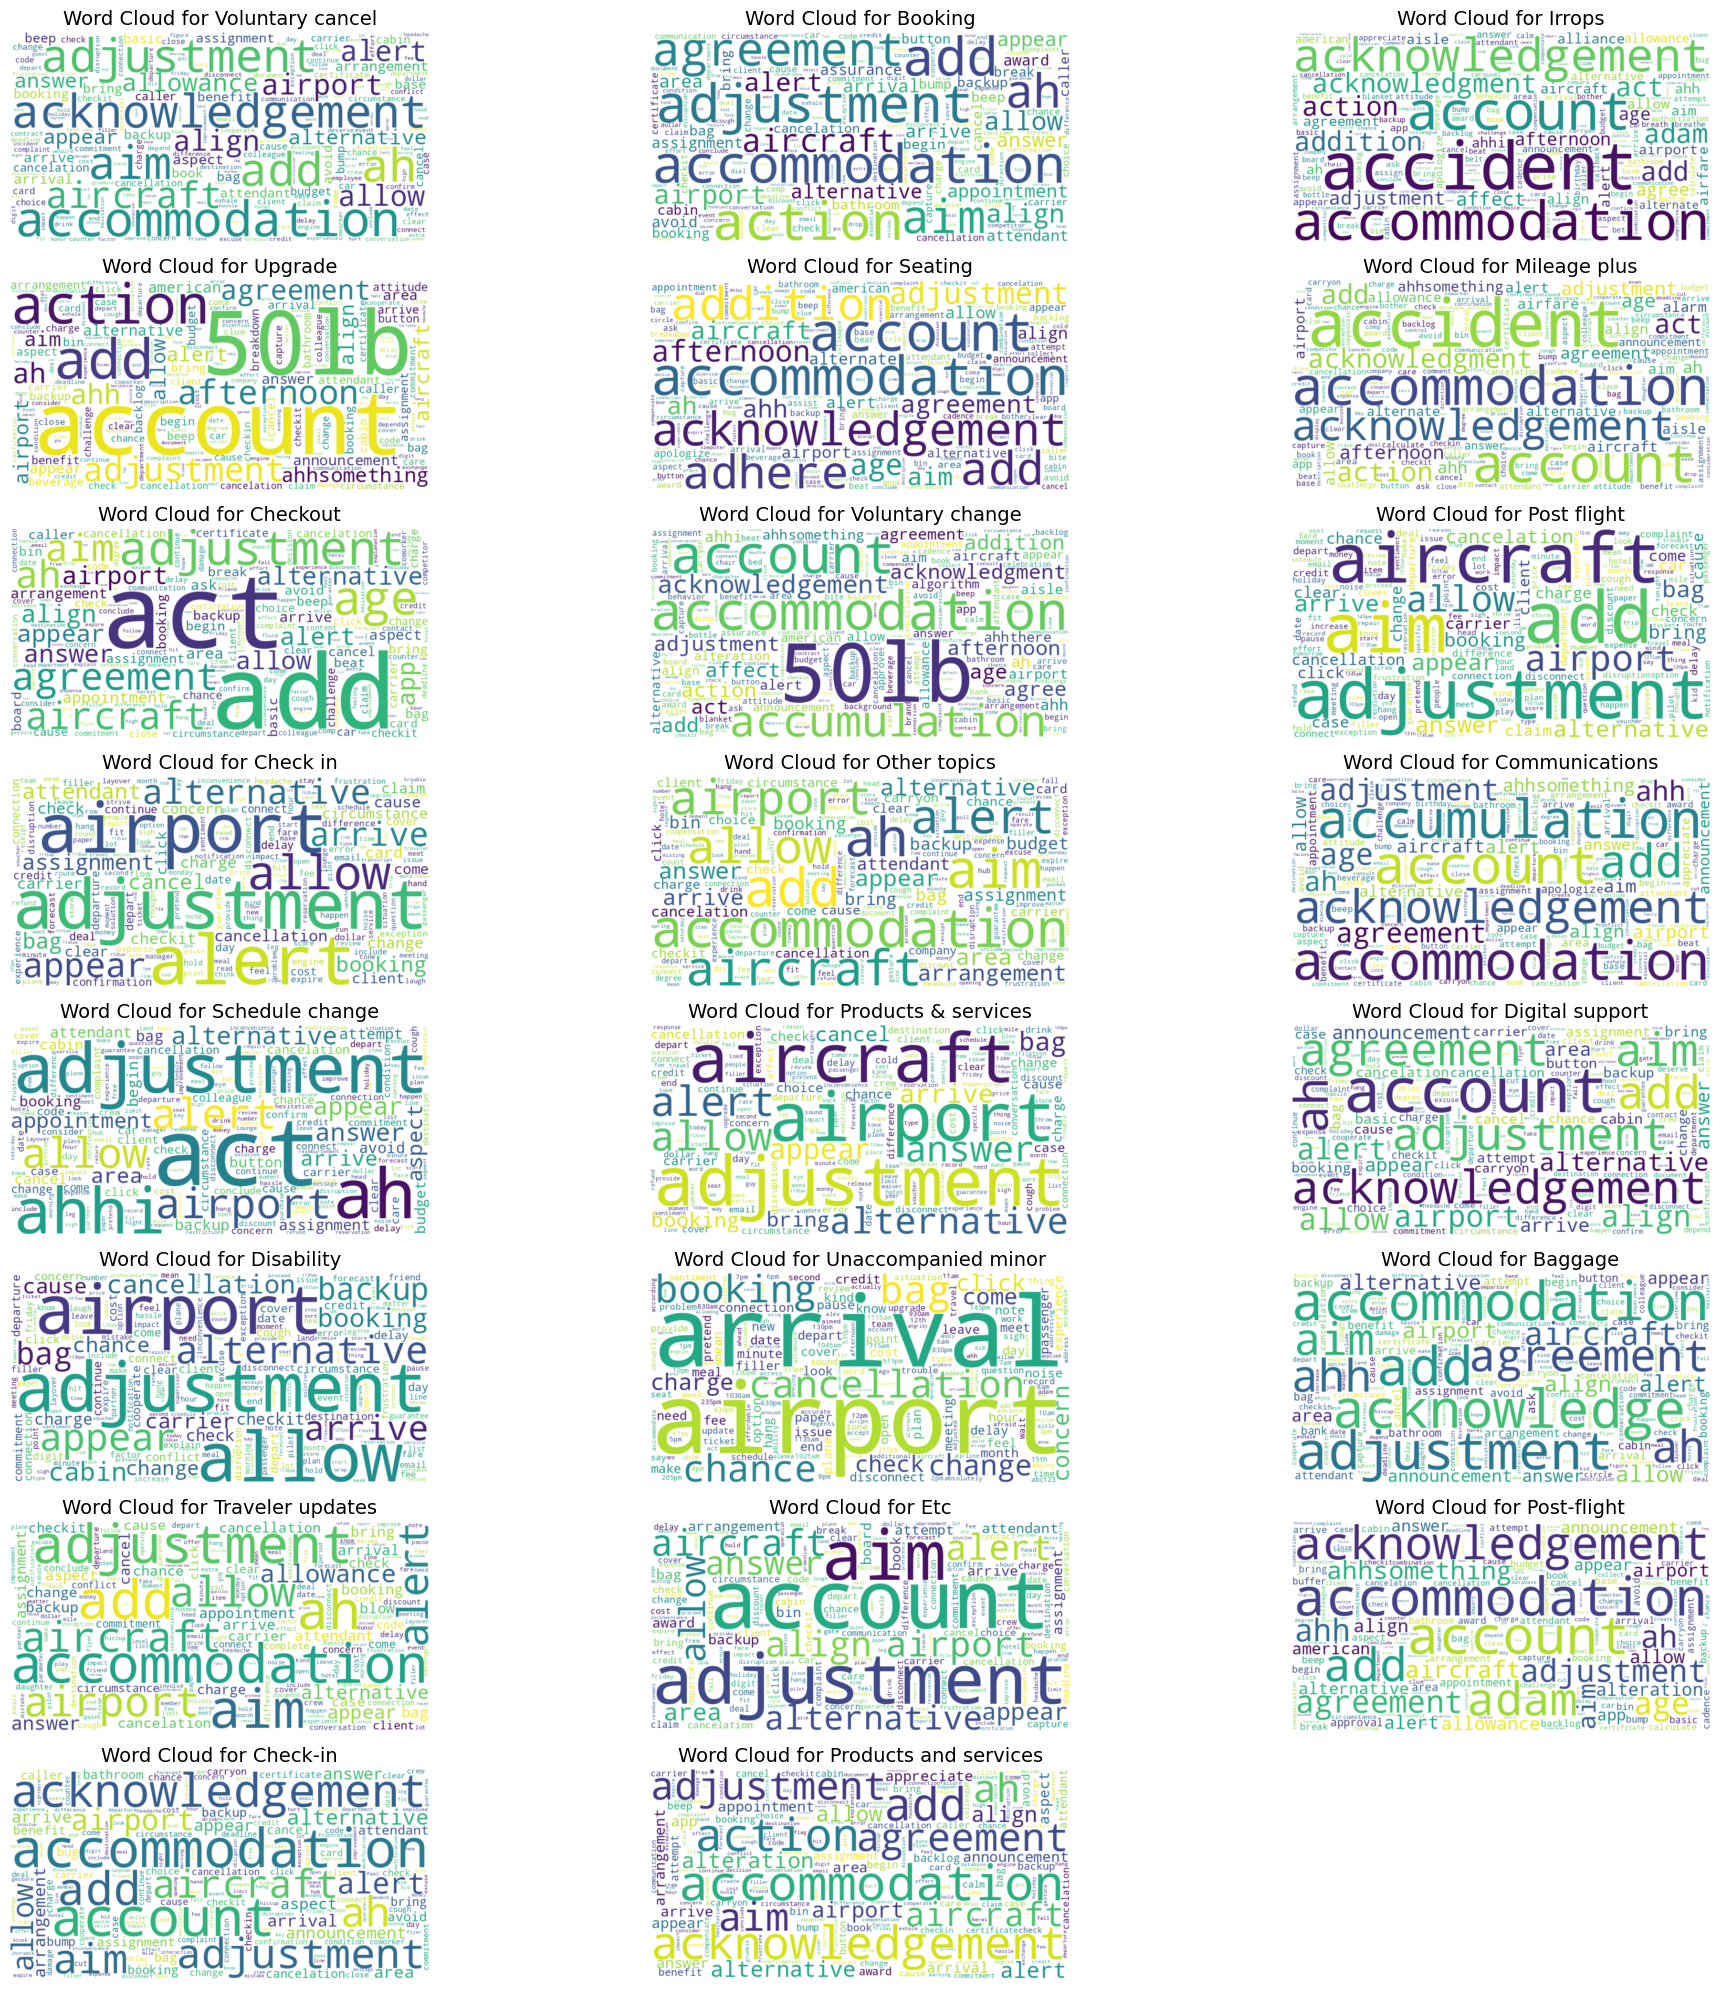

In [ ]:
# Iterate through each unique primary call reason
unique_reasons = calls_df['primary_call_reason'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(unique_reasons)//3 + 1, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for idx, reason in enumerate(unique_reasons):
    print(f"Analysis for Primary Call Reason: {reason}")

    # Filter calls with the current reason
    reason_calls = calls_df[calls_df['primary_call_reason'] == reason]

    # Preprocess the call transcripts
    reason_calls['processed_transcript'] = reason_calls['call_transcript'].apply(preprocess_text)

    # Generate a word cloud using unigrams
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(reason_calls['processed_transcript'])
    words = vectorizer.get_feature_names_out()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

    # Display the word cloud in the subplot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'Word Cloud for {reason}', fontsize=14)

# Remove any empty subplots
for i in range(len(unique_reasons), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.corpus import stopwords
import string

# Extract key phrases using TF-IDF and NMF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(calls_df['processed_transcript'])
nmf = NMF(n_components=10, random_state=42)
W = nmf.fit_transform(tfidf)
H = nmf.components_

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = topic_words
    return topics

no_top_words = 10
topics = display_topics(nmf, vectorizer.get_feature_names_out(), no_top_words)

# Map topics to primary call reasons
calls_df['dominant_topic'] = W.argmax(axis=1)
topic_reason_mapping = {}
for topic_idx in range(nmf.n_components):
    reasons = calls_df[calls_df['dominant_topic'] == topic_idx]['primary_call_reason'].unique()
    topic_reason_mapping[f"Topic {topic_idx}"] = reasons

# Display the mapping
for topic, reasons in topic_reason_mapping.items():
    print(f"{topic}: {', '.join(reasons)}")

# Identify recurring problems that could be resolved via self-service options
recurring_problems = {}
for topic, reasons in topic_reason_mapping.items():
    for reason in reasons:
        if reason not in recurring_problems:
            recurring_problems[reason] = []
        recurring_problems[reason].extend(topics[topic])

# Display the recurring problems
for reason, problems in recurring_problems.items():
    print(f"Primary Call Reason: {reason}")
    print(f"Recurring Problems: {', '.join(set(problems))}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0: Irrops, Seating, Voluntary change, Mileage plus, Products & services, Post flight, Communications, Checkout, Digital support, Upgrade, Voluntary cancel, Booking, Check in, Schedule change, Traveler updates, Baggage, Etc, Disability, Other topics, Post-flight, Unaccompanied minor, Check-in, Products and services
Topic 1: Checkout, Irrops, Post flight, Seating, Communications, Voluntary change, Upgrade, Products & services, Voluntary cancel, Schedule change, Mileage plus, Traveler updates, Booking, Baggage, Digital support, Check in, Disability, Etc, Other topics, Unaccompanied minor, Post-flight, Check-in, Products and services
Topic 2: Mileage plus, Post flight, Seating, Irrops, Voluntary change, Communications, Upgrade, Products & services, Voluntary cancel, Checkout, Baggage, Booking, Traveler updates, Other topics, Digital support, Check in, Etc, Disability, Schedule change, Post-flight, Check-in, Products and services, Unaccompanied minor
Topic 3: Voluntary cancel, Mileage

In [ ]:
sentiment_df.head(10)

call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  4667960400    963118    neutral         angry              -0.04   
1  1122072124    519057       calm       neutral               0.02   
2  6834291559    158319    neutral        polite              -0.13   
3  2266439882    488324    neutral    frustrated              -0.20   
4  1211603231    721730    neutral        polite              -0.05   
5  5297766997    817160       calm          calm               0.10   
6   324593040    519057    neutral    frustrated               0.00   
7  8902603117    488324       calm         angry               0.11   
8  7222687732    957331       calm       neutral               0.06   
9  4113684017    158319    neutral         angry              -0.19   

   silence_percent_average  
0                     0.39  
1                     0.35  
2                     0.32  
3                     0.20  
4                     0.35  
5                     0.11  
6                     0.25  
7                     0.35  
8                     0.54  
9                     0.29

In [ ]:
import altair as alt

# Histogram of average sentiment
alt.Chart(sentiment_df.head(200)).mark_bar().encode(
    alt.X("average_sentiment", bin=True),
    y='count()'
).properties(
    title="Distribution of Average Sentiment"
)
reason_id
# Boxplot of sentiment by agent tone
alt.Chart(sentiment_df.head(200)).mark_boxplot().encode(
    x='agent_tone',
    y='average_sentiment'
).properties(
    title="Sentiment by Agent Tone"
)

# Scatter plot of sentiment vs silence percentage
alt.Chart(sentiment_df.head(200)).mark_circle().encode(
    x='average_sentiment',
    y='silence_percent_average'
).properties(
    title="Sentiment vs Silence Percentage"
)



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Preprocess the call transcripts
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

calls_df['processed_transcript'] = calls_df['call_transcript'].apply(preprocess_text)

# Extract key phrases using TF-IDF and NMF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(calls_df['processed_transcript'])
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = topic_words
    return topics

no_top_words = 10
topics = display_topics(nmf, vectorizer.get_feature_names_out(), no_top_words)

# Map topics to primary call reasons
topic_reason_mapping = {}
for topic, words in topics.items():
    for word in words:
        reasons = calls_df[calls_df['processed_transcript'].str.contains(word)]['primary_call_reason'].unique()
        topic_reason_mapping[topic] = reasons

# Display the mapping
for topic, reasons in topic_reason_mapping.items():
    print(f"{topic}: {', '.join(reasons)}")

# Identify recurring problems that could be resolved via self-service options
recurring_problems = {}
for topic, reasons in topic_reason_mapping.items():
    for reason in reasons:
        if reason not in recurring_problems:
            recurring_problems[reason] = []
        recurring_problems[reason].extend(topics[topic])

# Display the recurring problems
for reason, problems in recurring_problems.items():
    print(f"Primary Call Reason: {reason}")
    print(f"Recurring Problems: {', '.join(set(problems))}")
    print()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0: Irrops, Mileage plus, Voluntary change, Other topics, Post flight, Schedule change, Products & services, Seating, Upgrade, Check in, Communications, Booking, Checkout, Voluntary cancel, Traveler updates, Unknown, Baggage, Digital support, Etc, Disability, Post-flight, Unaccompanied minor, Check-in, Products and services
Topic 1: Voluntary cancel, Upgrade, Mileage plus, Checkout, Irrops, Post flight, Seating, Communications, Products & services, Unknown, Voluntary change, Disability, Unaccompanied minor, Schedule change, Traveler updates, Booking, Baggage, Digital support, Check in, Etc, Other topics, Post-flight, Check-in, Products and services
Topic 2: Checkout, Post flight, Seating, Baggage, Mileage plus, Irrops, Products & services, Communications, Voluntary cancel, Voluntary change, Traveler updates, Upgrade, Other topics, Etc, Booking, Check in, Unknown, Schedule change, Digital support, Disability, Post-flight, Check-in, Products and services, Unaccompanied minor
Topic 3

In [ ]:
!pip install -q "google-generativeai>=0.7.2"

In [ ]:
from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY=userdata.get('API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel(model_name='gemini-1.5-pro-002')

In [ ]:
def generate_gemini_prompt(reason, recurring_problems):
  prompt = f"""
  Analyze the following information and provide a concise and actionable summary of the recurring problems
  related to the call reason '{reason}'.

  **Primary Call Reason:** {reason}

  **Recurring Problems:** {', '.join(recurring_problems)}

  **Summary Objectives:**

  * Identify the key issues underlying these recurring problems.
  * Suggest potential solutions or areas for improvement to address the recurring problems and reduce the need for calls related to '{reason}'.
  * Present the information in a way that's easy to understand and actionable for customer service improvement initiatives.

  """
  return prompt


In [ ]:
import time
for reason, problems in recurring_problems.items():
  prompt = generate_gemini_prompt(reason, list(set(problems)))  # Use set to avoid duplicates
  print(f"REASON '{reason}'")
  try:
      response = model.generate_content([prompt])
      print(f"AI Response for '{reason}':\n{response.text}\n")
  except Exception as e:
      print(f"An error occurred: {e}")
  # add a delay to avoid rate limits
  time.sleep(10)


REASON 'Irrops'
AI Response for 'Irrops':
**Irrops Call Driver Analysis:**

Customers frequently contact support due to disruptions (Irrops) stemming from:

* **Flight Schedule Changes:** Delays, cancellations, and changes to scheduled times (implied by "delayed," "missed," "schedule," "delays," "weather," "forecast," "earlier," "tonight," "tomorrow," "scheduled").  This leads to missed connections, changed itineraries ("itinerary," "change,"  "instead," "following," "dates"), and the need for rebooking ("standby," "booked," "reservation," "new," "assignment," "availability," "seats," "seat").
* **Baggage Issues:** Lost ("lost"), delayed ("luggage," "bags," "baggage," "bag," "checked"), and improperly handled baggage (implied by complaints like "ugh," "frustration").
* **Compensation and Refunds:** Requests for refunds ("refund," "fare," "double," "fee," "150", "500"), vouchers ("voucher"), and travel waivers ("waive") resulting from disruptions.
* **Rebooking Challenges:** Difficulty 

An error occurred: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro-002:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
REASON 'Checkout'
AI Response for 'Checkout':
Checkout calls frequently involve issues with **flight changes & disruptions**, **baggage**, **seat assignments**, and **refund/voucher requests**.  

**Key Issues & Potential Solutions:**

* **Flight Changes & Disruptions:** Customers frequently call about delays, cancellations (missed, delayed, schedule, weather), and changing reservations (change, earlier, dates, time, itinerary, tomorrow, tonight).  
    * **Solution:** Proactive notification of disruptions, flexible rebooking options online, and clear communication about compensation (voucher, refund).

* **Baggage:** Lost, delayed, or checked baggage (luggage, baggage, bags, bag, checked, lost) generates numerous calls.  
    * **Solution:** Improved baggage tracking, clear baggage poli

In [ ]:
test_df.head()

call_id
0  7732610078
1  2400299738
2  6533095063
3  7774450920
4  9214147168